In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [3]:
plt.style.use('ggplot')

In [4]:
data['sum'] = 1
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [5]:
cant_log = data[['tipodepropiedad']]
cant_log = cant_log.assign(count = 1)
cant_log = cant_log.groupby('tipodepropiedad').agg({'count':'sum'})
cant_log = cant_log.applymap(lambda x: np.log(x)).reset_index().sort_values(by ='count', ascending = False)
cant_log.head()

,tipodepropiedad,count
2,Casa,11.861587
0,Apartamento,10.956771
3,Casa en condominio,9.867705
20,Terreno,9.204825
12,Local Comercial,8.024535


Text(0, 0.5, 'Tipo de propiedad')

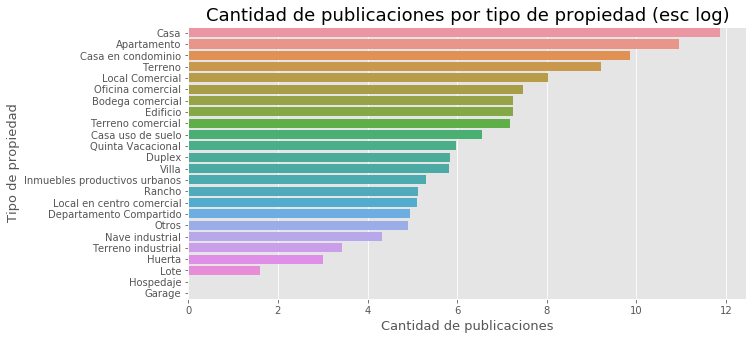

In [6]:
plt.figure(figsize = (10,5))
g = sns.barplot(x='count', y = 'tipodepropiedad', data = cant_log)
g.set_title("Cantidad de publicaciones por tipo de propiedad (esc log)", fontsize=18)
g.set_xlabel("Cantidad de publicaciones",fontsize=13)
g.set_ylabel("Tipo de propiedad",fontsize=13)

In [7]:
casa_garage = data[data['tipodepropiedad'] == 'Casa'][['garages']].reset_index(drop=True)
casa_garage.head()

,garages
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


Text(0, 0.5, 'Cantidad de publicaciones de casas')

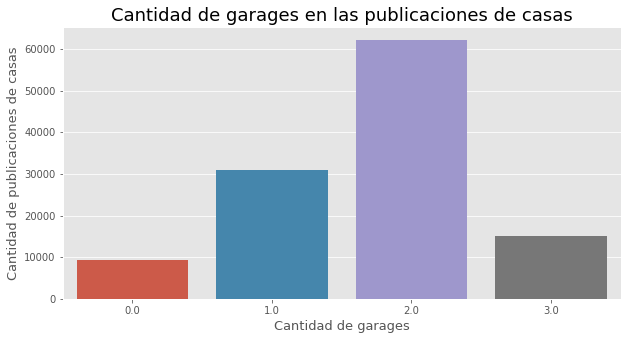

In [8]:
plt.figure(figsize = (10,5))
g = sns.countplot(x='garages', data = casa_garage)
g.set_title("Cantidad de garages en las publicaciones de casas", fontsize=18)
g.set_xlabel("Cantidad de garages", fontsize=13)
g.set_ylabel("Cantidad de publicaciones de casas", fontsize=13)

In [9]:
casa_garage = data[data['tipodepropiedad'] == 'Casa'][['garages','precio']].reset_index(drop=True)
#casa_garage.groupby('garages').agg({'precio':'mean'}).reset_index()

Text(0, 0.5, 'Precio')

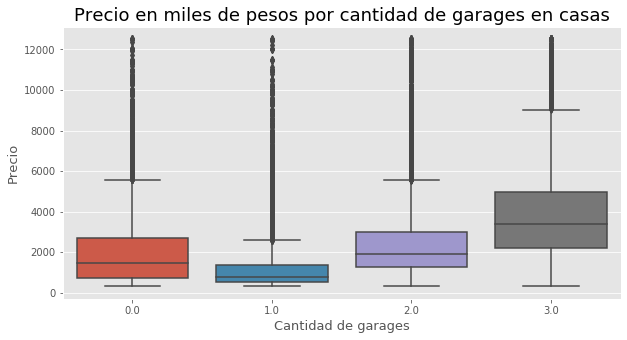

In [10]:
plt.figure(figsize = (10,5))
x = sns.boxplot(x=casa_garage['garages'], y=casa_garage['precio']/1000)
x.set_title("Precio en miles de pesos por cantidad de garages en casas", fontsize=18)
x.set_xlabel("Cantidad de garages", fontsize=13)
x.set_ylabel("Precio", fontsize=13)

In [11]:
tipo_prov = data[data['tipodepropiedad'].isin(['Casa','Apartamento', 'Casa en condominio'])]
tipo_prov.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,sum
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000,1
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000,1


Text(0, 0.5, 'Cantidad de publicaciones')

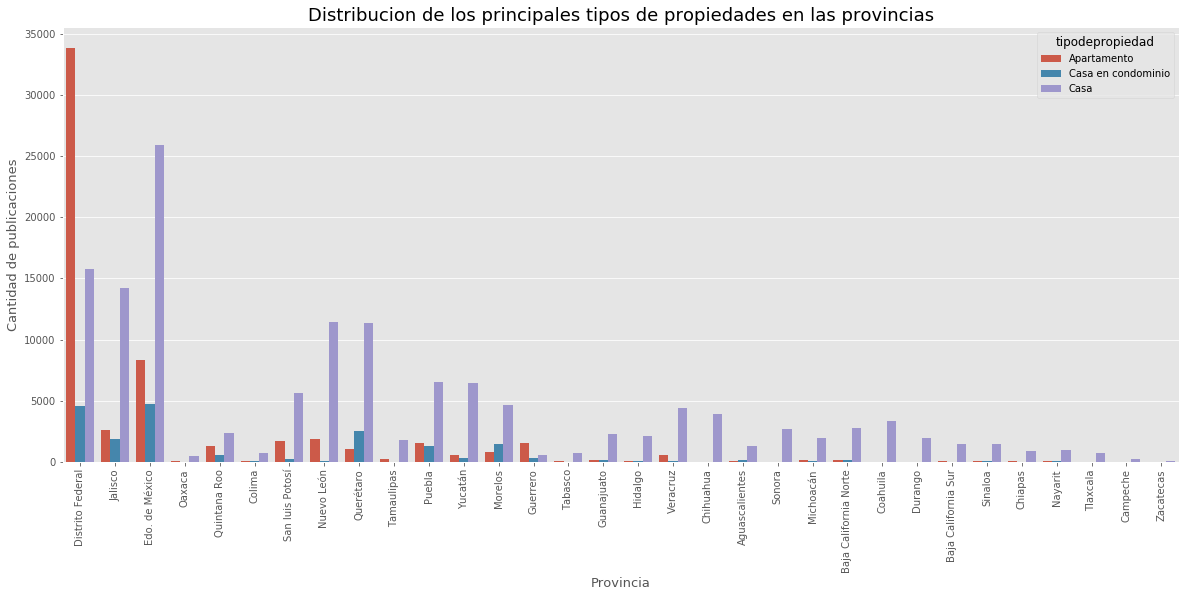

In [12]:
plt.figure(figsize=(20,8))
g = sns.countplot(x='provincia', hue='tipodepropiedad', data=tipo_prov)
plt.xticks(rotation = 90)
g.set_title("Distribucion de los principales tipos de propiedades en las provincias", fontsize=18)
g.set_xlabel("Provincia", fontsize=13)
g.set_ylabel("Cantidad de publicaciones", fontsize=13)

In [13]:
tipo_prov['sum'] = 1
provs = tipo_prov.groupby('provincia').agg({'sum':'sum'}).reset_index()
provs = provs[provs['sum']>3000]['provincia']
provs

/home/fer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1     Baja California Norte
5                 Chihuahua
6                  Coahuila
8          Distrito Federal
10           Edo. de México
14                  Jalisco
16                  Morelos
18               Nuevo León
20                   Puebla
21                Querétaro
22             Quintana Roo
23          San luis Potosí
29                 Veracruz
30                  Yucatán
Name: provincia, dtype: object

In [14]:
tipo_prov = tipo_prov[tipo_prov['provincia'].isin(provs)]

mean_prov = tipo_prov.groupby('provincia').agg({'sum':'sum'}).rename(columns={'sum':'total'})

tipo_prov = tipo_prov.groupby(['provincia','tipodepropiedad']).agg({'sum':'sum'}).reset_index()\
                     .join(mean_prov, how='left', on='provincia')\
                     .sort_values(by='total',ascending=False)
tipo_prov['proporcion'] = (tipo_prov['sum']/tipo_prov['total'])*100
tipo_prov.head()

,provincia,tipodepropiedad,sum,total,proporcion
11,Distrito Federal,Casa en condominio,4596,54247,8.472358
9,Distrito Federal,Apartamento,33839,54247,62.379486
10,Distrito Federal,Casa,15812,54247,29.148156
12,Edo. de México,Apartamento,8297,38952,21.300575
14,Edo. de México,Casa en condominio,4717,38952,12.109776


In [15]:
tipo_prov.head()

,provincia,tipodepropiedad,sum,total,proporcion
11,Distrito Federal,Casa en condominio,4596,54247,8.472358
9,Distrito Federal,Apartamento,33839,54247,62.379486
10,Distrito Federal,Casa,15812,54247,29.148156
12,Edo. de México,Apartamento,8297,38952,21.300575
14,Edo. de México,Casa en condominio,4717,38952,12.109776


Text(0.5, 1.0, 'Porcentaje de los principales tipos de propiedades para cada provincia')

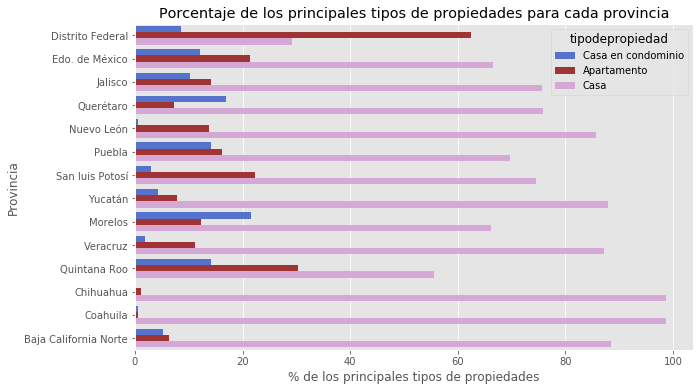

In [16]:
palette ={"Apartamento":"firebrick","Casa en condominio":"royalblue","Casa":"plum"}
plt.figure(figsize=(10, 6))
sns.barplot(x='proporcion', y='provincia', hue='tipodepropiedad', data=tipo_prov, palette=palette)
plt.ylabel('Provincia')
plt.xlabel('% de los principales tipos de propiedades')
plt.title('Porcentaje de los principales tipos de propiedades para cada provincia')

In [60]:
comer_prov = data[data['tipodepropiedad'].isin(['Local Comercial','Oficina comercial','Bodega comercial', 'Local en centro comercial'])]
comer_prov.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,sum
80,207641,local comercial en venta,excelente local de 70 m2 con baño totalmente r...,Local Comercial,Av. Lomas Verdes 825,Naucalpan de Juárez,Edo. de México,NaN,NaN,NaN,...,19.512083,-99.261452,2016-12-17 00:00:00,False,False,False,False,False,2350000,1
162,100792,departamento con locales comerciales,"excelente oportunidad de inversión, propiedad ...",Local Comercial,Rogelio Bacon No 1595,Guadalajara,Jalisco,20.0,4.0,1.0,...,NaN,NaN,2015-09-15 00:00:00,False,False,False,False,False,2800000,1


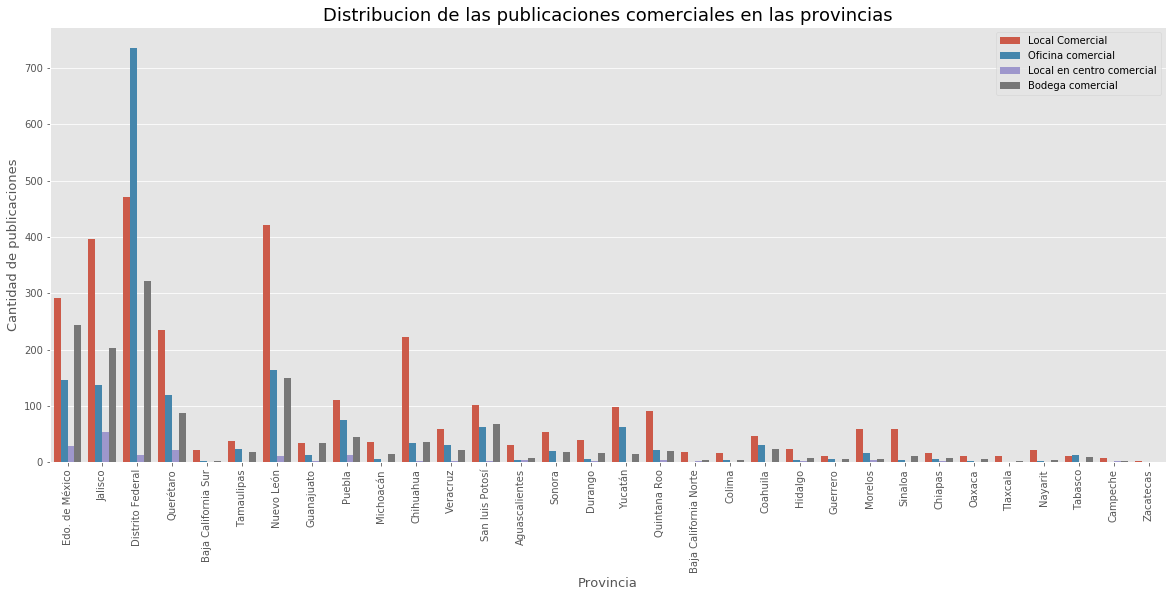

In [61]:
plt.figure(figsize=(20,8))
g = sns.countplot(x='provincia', hue='tipodepropiedad', data=comer_prov)
plt.xticks(rotation = 90)
g.set_title("Distribucion de las publicaciones comerciales en las provincias", fontsize=18)
g.set_xlabel("Provincia", fontsize=13)
g.set_ylabel("Cantidad de publicaciones", fontsize=13)
plt.legend(loc='upper right')

In [62]:
mex_df = data[data['provincia'].isin(['Distrito Federal'])]
mex_df.provincia.value_counts()

Distrito Federal    58790
Name: provincia, dtype: int64

In [94]:
mex_df.loc[mex_df['tipodepropiedad'].isin(['Local Comercial','Oficina comercial','Bodega comercial', 'Local en centro comercial']), 'comercial'] = True
mex_df[mex_df.comercial!=True] = False

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
comerciales = mex_df.comercial.sum()
no_comerciales = len(mex_df.comercial) - comerciales
no_comerciales

57248

In [100]:
comerc = pd.DataFrame({'cantidad': [comerciales, no_comerciales]}, index= ['Comerciales','Particulares'])

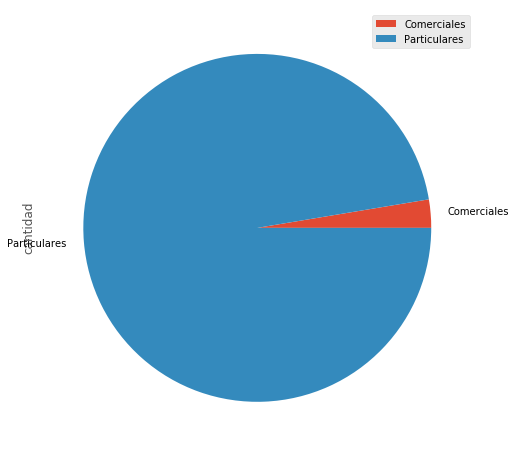

In [104]:
comerc.plot.pie(y='cantidad', figsize=(8, 8))

In [66]:
mex_df['sum'] = 1
mex_dfg = mex_df.groupby('tipodepropiedad').agg({'sum':'sum'}).reset_index()
otros = mex_dfg[mex_dfg['sum']<250]['sum'].sum()
mex_dfg = mex_dfg[mex_dfg['sum']>250]
mex_dfg = mex_dfg.set_value(len(mex_dfg), ['tipodepropiedad', 'sum'], ['Otros', otros]) 
mex_dfg.sort_values(by='sum', ascending=False,inplace=True)
mex_dfg['sum'] = mex_dfg['sum'].apply(lambda x: np.log(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


Text(0, 0.5, 'Tipo de propiedad')

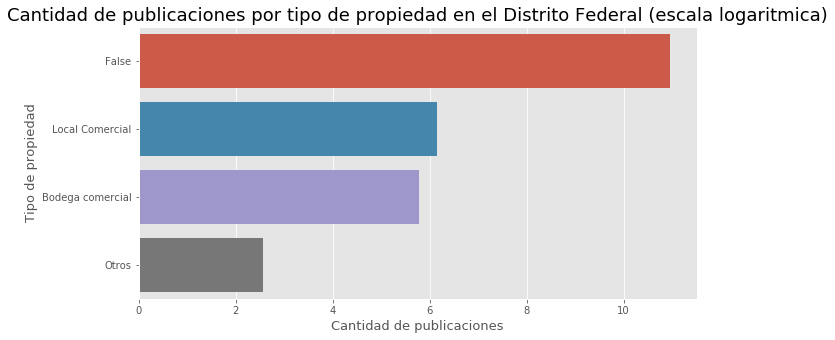

In [67]:
plt.figure(figsize = (10,5))
g = sns.barplot(x='sum', y = 'tipodepropiedad', data = mex_dfg)
g.set_title("Cantidad de publicaciones por tipo de propiedad en el Distrito Federal (escala logaritmica)", fontsize=18)
g.set_xlabel("Cantidad de publicaciones",fontsize=13)
g.set_ylabel("Tipo de propiedad",fontsize=13)

In [68]:
comercdf = mex_df[mex_df['tipodepropiedad'].isin(['Local Comercial','Oficina comercial','Bodega comercial', 'Local en centro comercial'])]
comerc_df = comercdf.groupby('tipodepropiedad').agg({'sum':'sum'}).sort_values(by='sum', ascending=False).reset_index().head(12)

Text(0, 0.5, 'Cantidad de propiedades')

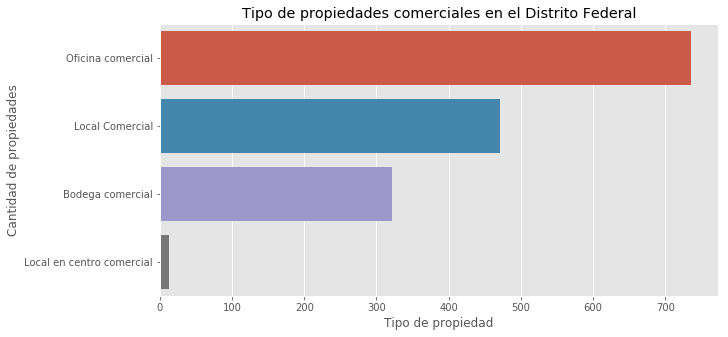

In [69]:
plt.figure(figsize=(10,5))
pl = sns.barplot(x='sum', y='tipodepropiedad', data = comerc_df)
pl.set_title("Tipo de propiedades comerciales en el Distrito Federal")
pl.set_xlabel("Tipo de propiedad")
pl.set_ylabel("Cantidad de propiedades")

In [70]:
comerc = data[data['tipodepropiedad'].isin(['Local Comercial','Oficina comercial','Bodega comercial', 'Local en centro comercial'])]
comerc_g = comerc.groupby('provincia').agg({'sum':'sum'}).sort_values(by='sum', ascending=False).reset_index().head(12)

Text(0, 0.5, 'Propiedades')

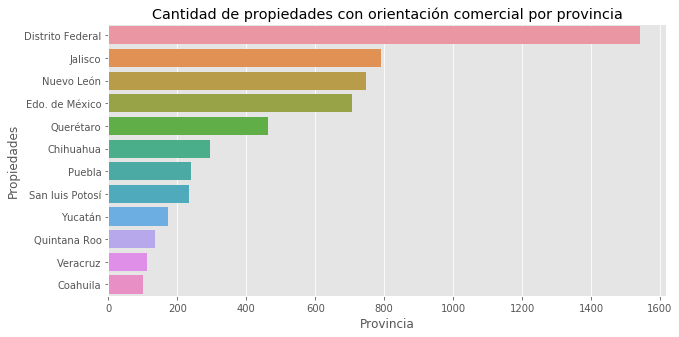

In [71]:
plt.figure(figsize=(10,5))
pl = sns.barplot(x='sum', y='provincia', data = comerc_g)
pl.set_title("Cantidad de propiedades con orientación comercial por provincia")
pl.set_xlabel("Provincia")
pl.set_ylabel("Propiedades")

In [72]:
comerc_g_ciudad = comerc.groupby('ciudad').agg({'sum':'sum'}).sort_values(by='sum', ascending=False).reset_index().head(12)

Text(0, 0.5, 'Propiedades')

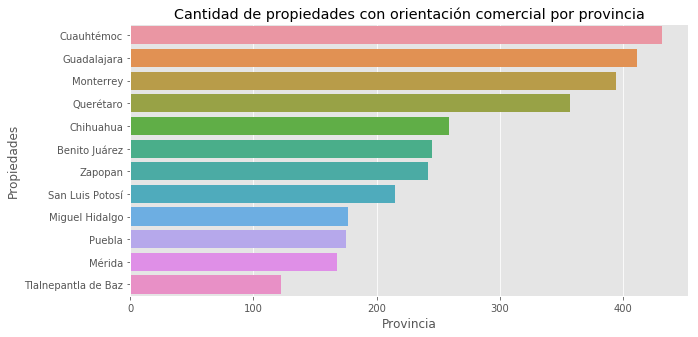

In [73]:
plt.figure(figsize=(10,5))
pl = sns.barplot(x='sum', y='ciudad', data = comerc_g_ciudad)
pl.set_title("Cantidad de propiedades con orientación comercial por provincia")
pl.set_xlabel("Provincia")
pl.set_ylabel("Propiedades")

In [74]:
casa = data[data['tipodepropiedad'] == 'Casa']
apartam = data[data['tipodepropiedad'] == 'Apartamento']
casa_cond = data[data['tipodepropiedad'] == 'Casa en condominio']
data_tipos = data[(data['tipodepropiedad'].isin(['Casa','Apartamento','Casa en condominio']))]

Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 720x360 with 0 Axes>

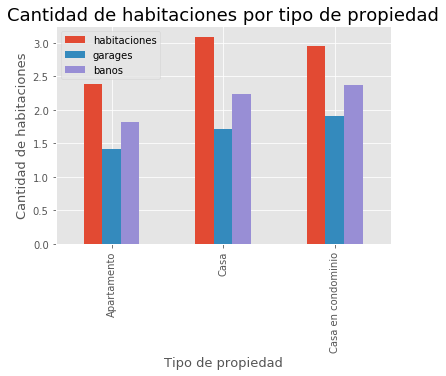

In [87]:
tipos_habitaciones = data_tipos.groupby('tipodepropiedad').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
plt.figure(figsize = (10,5))
x =tipos_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones por tipo de propiedad", fontsize=18)
x.set_xlabel("Tipo de propiedad", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

Text(0, 0.5, 'Metros')

<Figure size 720x360 with 0 Axes>

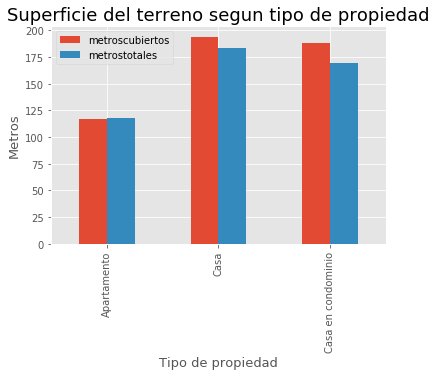

In [93]:
tipos_habitaciones = data_tipos.groupby('tipodepropiedad').agg({'metroscubiertos':'mean','metrostotales':'mean'})
plt.figure(figsize = (10,5))
x =tipos_habitaciones.plot(kind='bar')
x.set_title("Superficie del terreno segun tipo de propiedad", fontsize=18)
x.set_xlabel("Tipo de propiedad", fontsize=13)
x.set_ylabel("Metros", fontsize=13)

Text(0, 0.5, 'Precio (en miles de pesos mexicanos)')

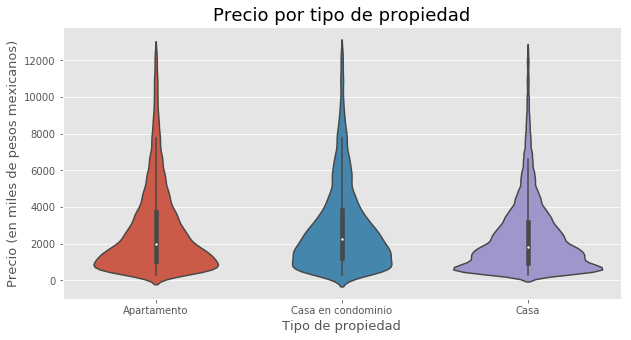

In [118]:
#tipos_precio = data_tipos.groupby('tipodepropiedad').agg({'precio':'mean'}).reset_index()
plt.figure(figsize = (10,5))
x = sns.violinplot(x=data_tipos['tipodepropiedad'], y=data_tipos['precio']/1000)
x.set_title("Precio por tipo de propiedad", fontsize=18)
x.set_xlabel("Tipo de propiedad", fontsize=13)
x.set_ylabel("Precio (en miles de pesos mexicanos)", fontsize=13)

In [20]:
tipo_prop_ciu_df = data[data["provincia"] == "Distrito Federal"].loc[data["ciudad"]!= "otra"]
tipo_prop_ciu_df_viv = tipo_prop_ciu_df[(tipo_prop_ciu_df["tipodepropiedad"] == "Casa") |
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Apartamento") |
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Casa en condominio") |
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Edificio") |
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Casa uso de suelo") |
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Duplex") | 
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Rancho") | 
                                        (tipo_prop_ciu_df["tipodepropiedad"] == "Departamento Compartido")]
tipo_prop_ciu_df_comer = tipo_prop_ciu_df[(tipo_prop_ciu_df["tipodepropiedad"] == "Local Comercial") |
                                          (tipo_prop_ciu_df["tipodepropiedad"] == "Oficina comercial") |
                                          (tipo_prop_ciu_df["tipodepropiedad"] == "Bodega comercial") |
                                          (tipo_prop_ciu_df["tipodepropiedad"] == "Terreno comercial") |
                                          (tipo_prop_ciu_df["tipodepropiedad"] == "Local en centro comercial")]

tipo_prop_ciu_df_comer = tipo_prop_ciu_df_comer.drop(columns="tipodepropiedad")
tipo_prop_ciu_df_comer["tipodepropiedad"] = "Comercial"

tipo_prop_ciu_df_viv = tipo_prop_ciu_df_viv.drop(columns="tipodepropiedad")
tipo_prop_ciu_df_viv["tipodepropiedad"] = "Vivienda"

tipo_prop_ciu_df_viv = tipo_prop_ciu_df_viv[["ciudad","tipodepropiedad"]]
tipo_prop_ciu_df_comer = tipo_prop_ciu_df_comer[["ciudad","tipodepropiedad"]]
tipo_prop_ciu = tipo_prop_ciu_df_comer.append(tipo_prop_ciu_df_viv).rename(columns={"tipodepropiedad":"clase de propiedad"})


Text(0, 0.5, 'Cantidad de propiedades')

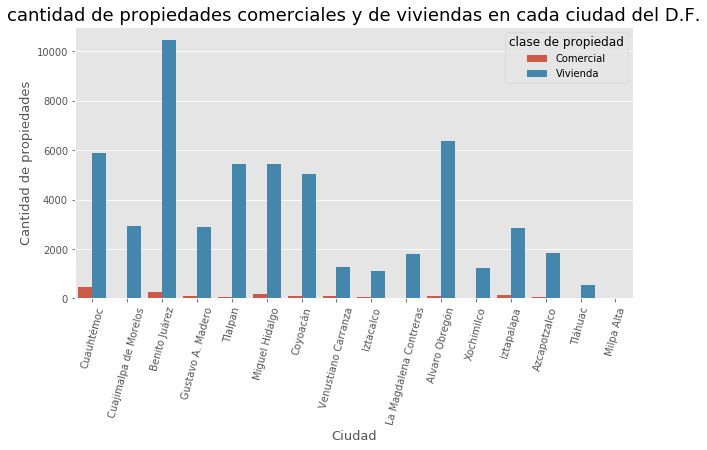

In [22]:
plt.figure(figsize=(10,5))
g = sns.countplot(x='ciudad', hue='clase de propiedad', data=tipo_prop_ciu)
plt.xticks(rotation=75)
g.set_title("cantidad de propiedades comerciales y de viviendas en cada ciudad del D.F.", fontsize = 18)
g.set_xlabel("Ciudad", fontsize = 13)
g.set_ylabel("Cantidad de propiedades", fontsize = 13)

In [28]:
precio_tipo_prop_df = data[data["provincia"] == "Distrito Federal"]
precio_tipo_prop_df = precio_tipo_prop_df[precio_tipo_prop_df["ciudad"] != "otra"]
precio_tipo_prop_df = precio_tipo_prop_df[["precio", "tipodepropiedad"]]

Text(0.5, 1.0, 'Precio dependiendo el tipo de propiedad en el D.F.')

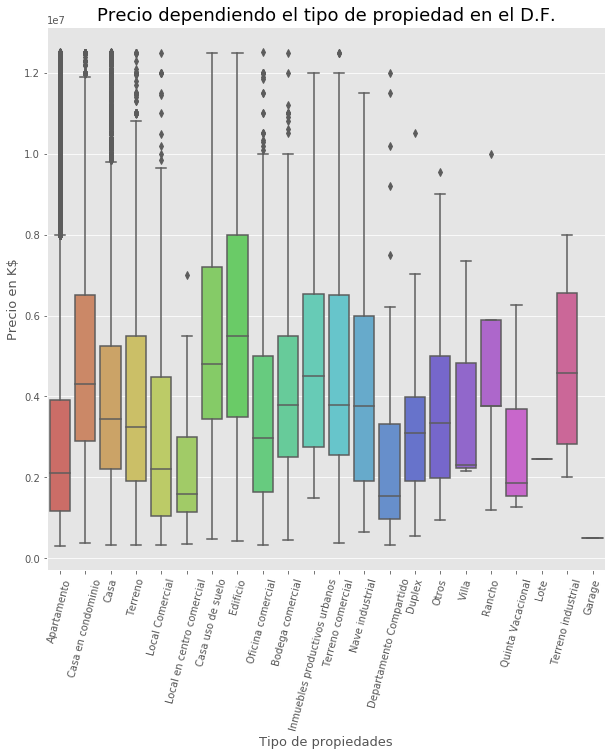

In [29]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="tipodepropiedad", y="precio", data=precio_tipo_prop_df, palette="hls") 
plt.xticks(rotation = 75)
g.set_xlabel("Tipo de propiedades", fontsize = 13)
g.set_ylabel("Precio en K$", fontsize = 13)
g.set_title("Precio dependiendo el tipo de propiedad en el D.F.", fontsize = 18)